In [ ]:
import numpy as np
import numpy.random as rand
import math
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize


In [ ]:
import autograd.numpy as np
from autograd import grad, jacobian

In [ ]:
!pip install autograd

# Linear and rational functions and  numerical minimization functions for the method of least squares

In [ ]:
def lin(x,a,b):
    return a*x + b

def rat(x,a,b):
    return a/(b*x + 1)
    
def funcmls(x,fun):
    return sum((fun(x_orig,x[0],x[1])-y_orig)**2)

# Generate data

In [ ]:
from random import random
from random import normalvariate
eps = 0.001
alfa = random()
betta = random()
k = np.arange (101)
x_orig = k/100
y_orig = np.array(k,dtype='float32')

for k in range(101): 
    delta = normalvariate(0, 1)
    y_orig[k] = alfa*x_orig[k]+betta+delta

print (alfa, betta)

0.013575940483482762 0.7084707743580431


In [ ]:
x_orig

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
y_orig

array([-1.55281067e+00, -6.26875699e-01,  8.78328860e-01,  2.38343045e-01,
        5.39539099e-01,  5.27891576e-01, -2.15107828e-01,  1.29867291e+00,
        7.16675520e-01,  3.02892268e-01,  1.14170122e+00, -1.54472953e-02,
        3.40918660e-01,  9.12521064e-01, -4.58495051e-01,  1.49440420e+00,
        1.31545389e+00,  1.06248748e+00,  1.70704579e+00,  5.59954643e-01,
       -8.08720708e-01,  9.11158323e-01,  9.22187090e-01,  2.36206961e+00,
        1.30167282e+00,  1.26264715e+00,  2.48269826e-01, -3.44149396e-02,
        3.92868251e-01, -1.28505492e+00,  2.16721964e+00, -1.11336417e-01,
        1.12164307e+00,  5.03428914e-02,  1.25565302e+00,  1.31956756e+00,
        6.90472066e-01,  6.85613751e-01,  1.41269851e+00, -2.78980106e-01,
        5.76261401e-01,  1.63291776e+00,  6.14490807e-01, -5.31242907e-01,
        2.30125114e-01,  4.32200462e-01,  9.69390213e-01, -5.01192570e-01,
        1.74657360e-01,  1.26572192e+00,  1.62482429e+00, -2.99225539e-01,
        1.23968959e+00, -

# Gradient Descent, Conjugate Gradient Descent, Newton’s method and Levenberg-Marquardt algorithm

In [ ]:
min_list_lin_1 = minimize(funcmls, x0=(0, 0), method='BFGS', args=(lin,), tol=eps, options={'return_all': True}) #Gradient Descent
min_list_lin_2 = minimize(funcmls, x0=(0, 0), method='CG', args=(lin,), tol=eps, options={'return_all': True}) #Conjugate Gradient Descent
min_list_lin_3 = minimize(funcmls, x0=(0, 0), method='Newton-CG', jac=jacobian(funcmls), args=(lin,), tol=eps, options={'return_all': True}) #Newton’s method
min_list_lin_4 = curve_fit(lin, xdata=x_orig, ydata=y_orig, method='lm') #Levenberg-Marquardt algorithm

min_list_rat_1 = minimize(funcmls, x0=(0, 0), method='BFGS', args=(rat,), tol=eps, options={'return_all': True}) #Gradient Descent
min_list_rat_2 = minimize(funcmls, x0=(0, 0), method='CG', args=(rat,), tol=eps, options={'return_all': True}) #Conjugate Gradient Descent
min_list_rat_3 = minimize(funcmls, x0=(0, 0), method='Newton-CG', jac=jacobian(funcmls), args=(rat,), tol=eps, options={'return_all': True}) #Newton’s method
min_list_rat_4 = curve_fit(rat, xdata=x_orig, ydata=y_orig, method='lm') #Levenberg-Marquardt algorithm

In [9]:
!pip install prettytable

In [13]:
iter_exp = 8
curve_fit(lin, xdata=x_orig, ydata=y_orig, method='lm', maxfev = iter_exp) #Levenberg-Marquardt algorithm

(array([-0.21336256,  0.61092537]),
 array([[ 0.09689403, -0.04844701],
        [-0.04844701,  0.0324595 ]]))

In [21]:
iter_exp2 = 32
curve_fit(rat, xdata=x_orig, ydata=y_orig, method='lm', maxfev = iter_exp2) #Levenberg-Marquardt algorithm

(array([0.58652495, 0.3392231 ]),
 array([[0.04331619, 0.14784232],
        [0.14784232, 0.677333  ]]))

# Calculation results

In [22]:
alfa_lin_1 = min_list_lin_1.x[0]
betta_lin_1 = min_list_lin_1.x[1]
countf_lin_1 = min_list_lin_1.nfev
iter_lin_1 = min_list_lin_1.nit
res_lin_1 = (funcmls(min_list_lin_1.x, lin))

alfa_lin_2 = min_list_lin_2.x[0]
betta_lin_2 = min_list_lin_2.x[1]
countf_lin_2 = min_list_lin_2.nfev
iter_lin_2 = min_list_lin_2.nit
res_lin_2 = (funcmls(min_list_lin_2.x, lin))

alfa_lin_3 = min_list_lin_3.x[0]
betta_lin_3 = min_list_lin_3.x[1]
countf_lin_3 = min_list_lin_3.nfev
iter_lin_3 = min_list_lin_3.nit
res_lin_3 = (funcmls(min_list_lin_3.x, lin))

alfa_lin_4 = min_list_lin_4[0][0]
betta_lin_4 = min_list_lin_4[0][1]
countf_lin_4 = iter_exp
iter_lin_4 = iter_exp
res_lin_4 = (funcmls(min_list_lin_4[0], lin))

alfa_rat_1 = min_list_rat_1.x[0]
betta_rat_1 = min_list_rat_1.x[1]
countf_rat_1 = min_list_rat_1.nfev
iter_rat_1 = min_list_rat_1.nit
res_rat_1 = (funcmls(min_list_rat_1.x, lin))

alfa_rat_2 = min_list_rat_2.x[0]
betta_rat_2 = min_list_rat_2.x[1]
countf_rat_2 = min_list_rat_2.nfev
iter_rat_2 = min_list_rat_2.nit
res_rat_2 = (funcmls(min_list_rat_2.x, lin))


alfa_rat_3 = min_list_rat_3.x[0]
betta_rat_3 = min_list_rat_3.x[1]
countf_rat_3 = min_list_rat_3.nfev
iter_rat_3 = min_list_rat_3.nit
res_rat_3 = (funcmls(min_list_rat_3.x, lin))

alfa_rat_4 = min_list_rat_4[0][0]
betta_rat_4 = min_list_rat_4[0][1]
countf_rat_4 = iter_exp2
iter_rat_4 = iter_exp2
res_rat_4 = (funcmls(min_list_rat_4[0], lin))

from prettytable import PrettyTable
th = ['Function', 'Method', 'a', 'b', 'minimum f', ' number of f-calculations', 'number of iterations' ]
td = ['ax+b', 'Gradient Descent', '%.3f' % alfa_lin_1, '%.3f' % betta_lin_1, '%.3f' % res_lin_1, countf_lin_1, iter_lin_1,
      'ax+b', 'Conjugate Gradient Descent', '%.3f' % alfa_lin_2, '%.3f' % betta_lin_2, '%.3f' % res_lin_2, countf_lin_2, iter_lin_2,
      'ax+b', 'Newton’s method', '%.3f' % alfa_lin_3, '%.3f' % betta_lin_3, '%.3f' % res_lin_3, countf_lin_3, iter_lin_3,
      'ax+b', 'Levenberg-Marquardt algorithm', '%.3f' % alfa_lin_4, '%.3f' % betta_lin_4, '%.3f' % res_lin_4, countf_lin_4, iter_lin_4,
      '', '', '', '', '', '', '',
      'a/(1+bx)', 'Gradient Descent', '%.3f' % alfa_rat_1, '%.3f' % betta_rat_1, '%.3f' % res_rat_1, countf_rat_1, iter_rat_1,
      'a/(1+bx)', 'Conjugate Gradient Descent', '%.3f' % alfa_rat_2, '%.3f' % betta_rat_2, '%.3f' % res_rat_2, countf_rat_2, iter_rat_2,
      'a/(1+bx)', 'Newton’s method', '%.3f' % alfa_rat_3, '%.3f' % betta_rat_3, '%.3f' % res_rat_3, countf_rat_3, iter_rat_3,
      'a/(1+bx)', 'Levenberg-Marquardt algorithm', '%.3f' % alfa_rat_4, '%.3f' % betta_rat_4, '%.3f' % res_rat_4, countf_rat_4, countf_rat_4]

columns = len(th)
table = PrettyTable(th)
td_data = td[:]

while td_data:
    table.add_row(td_data[:columns])
    td_data = td_data[columns:]

print(table) 

+----------+-------------------------------+--------+-------+-----------+---------------------------+----------------------+
| Function |             Method            |   a    |   b   | minimum f |  number of f-calculations | number of iterations |
+----------+-------------------------------+--------+-------+-----------+---------------------------+----------------------+
|   ax+b   |        Gradient Descent       | -0.213 | 0.611 |   82.352  |             15            |          2           |
|   ax+b   |   Conjugate Gradient Descent  | -0.213 | 0.611 |   82.352  |             15            |          2           |
|   ax+b   |        Newton’s method        | -0.213 | 0.611 |   82.352  |             37            |          2           |
|   ax+b   | Levenberg-Marquardt algorithm | -0.213 | 0.611 |   82.352  |             8             |          8           |
|          |                               |        |       |           |                           |                      |


# Results graphs

<ipython-input-23-74d38599d43d>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./1.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-23-74d38599d43d>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./1.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-23-74d38599d43d>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./2.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-23-74d38599d43d>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 an

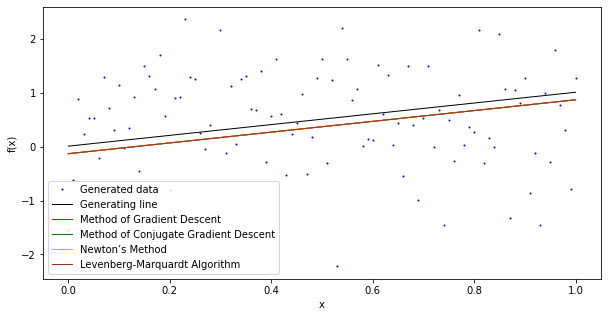

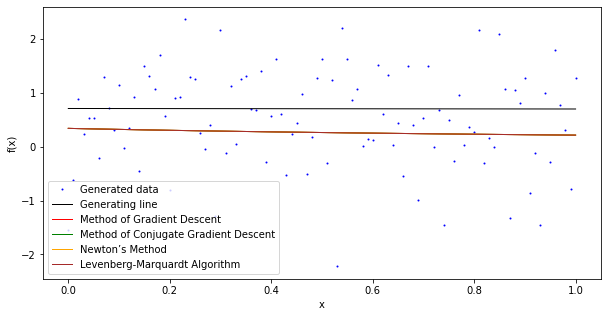

In [23]:

plt.figure(figsize=(10,5))
plt.plot(x_orig, y_orig, 'bo', label='Generated data', markersize=1)
plt.plot(x_orig, lin(alfa,betta,x_orig),'', color = 'black', linewidth=1, label="Generating line")
plt.plot(x_orig, lin(alfa_lin_1,betta_lin_1,x_orig),'', color = 'red', linewidth=1, label="Method of Gradient Descent")
plt.plot(x_orig, lin(alfa_lin_2,betta_lin_2,x_orig),'', color = 'green', linewidth=1, label="Method of Conjugate Gradient Descent")
plt.plot(x_orig, lin(alfa_lin_3,betta_lin_3,x_orig),'', color = 'orange', linewidth=1, label="Newton’s Method")
plt.plot(x_orig, lin(alfa_lin_4,betta_lin_4,x_orig),'', color = 'brown', linewidth=1, label="Levenberg-Marquardt Algorithm")

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig(fname = "./1.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

plt.figure(figsize=(10,5))
plt.plot(x_orig, y_orig, 'bo', label='Generated data', markersize=1)
plt.plot(x_orig, rat(alfa,betta,x_orig),'', color = 'black', linewidth=1, label="Generating line")
plt.plot(x_orig, rat(alfa_rat_1,betta_rat_1,x_orig),'', color = 'red', linewidth=1, label="Method of Gradient Descent")
plt.plot(x_orig, rat(alfa_rat_2,betta_rat_2,x_orig),'', color = 'green', linewidth=1, label="Method of Conjugate Gradient Descent")
plt.plot(x_orig, rat(alfa_rat_3,betta_rat_3,x_orig),'', color = 'orange', linewidth=1, label="Newton’s Method")
plt.plot(x_orig, rat(alfa_rat_4,betta_rat_4,x_orig),'', color = 'brown', linewidth=1, label="Levenberg-Marquardt Algorithm")

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig(fname = "./2.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)